In [6]:
#Chunk that sloads necessary packages & sets working environment to where the jupyterlab notebook file is 
%load_ext autoreload
%autoreload 2
import gnssvod as gv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pdb
import importlib
import zipfile
import os
import xarray as xr
import glob
import shutil
from gnssvod.hemistats.hemistats import hemibuild
#import georinex as gr
from matplotlib.collections import PatchCollection
import matplotlib.dates as mdates
import shutil
from matplotlib import rcParams
from datetime import datetime, timedelta

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
#pairing and concatenating--- starting by establishing path to .nc files per station
##here MACROCOSM 5 & 1 are references
# MACROCOSM 3 is located in-
#MACROCOSM 2 is located in-
#MACROCOSM-7 is located in-
pattern={'MACROCOSM-1':'/Volumes/coraldelmar/all_data/MACROCOSM-1/nc/*.nc',
        'MACROCOSM-2':'/Volumes/coraldelmar/all_data/MACROCOSM-2/nc/*.nc',
        'MACROCOSM-3':'/Volumes/coraldelmar/all_data/MACROCOSM-3/nc/*.nc',
        'MACROCOSM-5':'/Volumes/coraldelmar/all_data/MACROCOSM-5/nc/*.nc',
        'MACROCOSM-7':'/Volumes/coraldelmar/all_data/MACROCOSM-7/nc/*.nc'}

In [8]:
startday = start=pd.to_datetime('01-01-2025',format='%d-%m-%Y')
timeintervals=pd.interval_range(start=startday, periods=150, freq='D', closed='left')
timeintervals

IntervalIndex([[2025-01-01 00:00:00, 2025-01-02 00:00:00),
               [2025-01-02 00:00:00, 2025-01-03 00:00:00),
               [2025-01-03 00:00:00, 2025-01-04 00:00:00),
               [2025-01-04 00:00:00, 2025-01-05 00:00:00),
               [2025-01-05 00:00:00, 2025-01-06 00:00:00),
               [2025-01-06 00:00:00, 2025-01-07 00:00:00),
               [2025-01-07 00:00:00, 2025-01-08 00:00:00),
               [2025-01-08 00:00:00, 2025-01-09 00:00:00),
               [2025-01-09 00:00:00, 2025-01-10 00:00:00),
               [2025-01-10 00:00:00, 2025-01-11 00:00:00),
               ...
               [2025-05-21 00:00:00, 2025-05-22 00:00:00),
               [2025-05-22 00:00:00, 2025-05-23 00:00:00),
               [2025-05-23 00:00:00, 2025-05-24 00:00:00),
               [2025-05-24 00:00:00, 2025-05-25 00:00:00),
               [2025-05-25 00:00:00, 2025-05-26 00:00:00),
               [2025-05-26 00:00:00, 2025-05-27 00:00:00),
               [2025-05-27 00:00:00, 

In [9]:
ds=xr.open_mfdataset('/Volumes/coraldelmar/all_data/MACROCOSM-5.7/*.nc',combine='nested',concat_dim='Epoch')
ds

<xarray.Dataset> Size: 3GB
Dimensions:    (Station: 2, Epoch: 304618, SV: 110)
Coordinates:
  * Station    (Station) <U11 88B 'MACROCOSM-5' 'MACROCOSM-7'
  * SV         (SV) <U3 1kB 'C11' 'C12' 'C14' 'C19' ... 'R24' 'R25' 'R26' 'R27'
  * Epoch      (Epoch) datetime64[ns] 2MB 2023-05-08T12:18:30 ... 2025-04-15T...
Data variables:
    S1C        (Station, Epoch, SV) float64 536MB dask.array<chunksize=(1, 11, 3), meta=np.ndarray>
    S1X        (Station, Epoch, SV) float64 536MB dask.array<chunksize=(1, 11, 3), meta=np.ndarray>
    S2C        (Station, Epoch, SV) float64 536MB dask.array<chunksize=(1, 11, 3), meta=np.ndarray>
    S2X        (Station, Epoch, SV) float64 536MB dask.array<chunksize=(1, 11, 3), meta=np.ndarray>
    Azimuth    (Station, Epoch, SV) float64 536MB dask.array<chunksize=(1, 11, 3), meta=np.ndarray>
    Elevation  (Station, Epoch, SV) float64 536MB dask.array<chunksize=(1, 11, 3), meta=np.ndarray>

In [10]:
df=ds.to_dataframe().dropna(how='all').reorder_levels(["Station","Epoch","SV"]).sort_index()
df

S1C   S1X   S2C   S2X  Azimuth  \
Station     Epoch               SV                                     
MACROCOSM-5 2023-05-08 12:18:30 C11   NaN   NaN   NaN   NaN   -162.3   
                                C12   NaN   NaN   NaN   NaN     58.2   
                                C24   NaN   NaN   NaN   NaN     46.2   
                                C34   NaN   NaN   NaN   NaN   -175.4   
                                E14   NaN  46.0   NaN   NaN   -109.8   
...                                   ...   ...   ...   ...      ...   
MACROCOSM-7 2025-04-15 13:53:30 R14   NaN   NaN   NaN  29.4    -47.5   
                                R20  24.6   NaN   NaN   NaN      NaN   
                                R21  43.9   NaN   NaN   NaN      NaN   
                                R22  25.7   NaN   NaN   NaN      NaN   
                                R26   NaN   NaN  17.7   NaN    116.0   

                                     Elevation  
Station     Epoch               SV              
MACROCOSM-5 2023-05-08 12:18:30 C11       52.0  
                                C12       67.1  
                                C24       54.3  
                                C34       74.4  
                                E14       68.7  
...                                        ...  
MACROCOSM-7 2025-04-15 13:53:30 R14       38.4  
                                R20        NaN  
                                R21        NaN  
                                R22        NaN  
                                R26       30.5  

[9915624 rows x 6 columns]

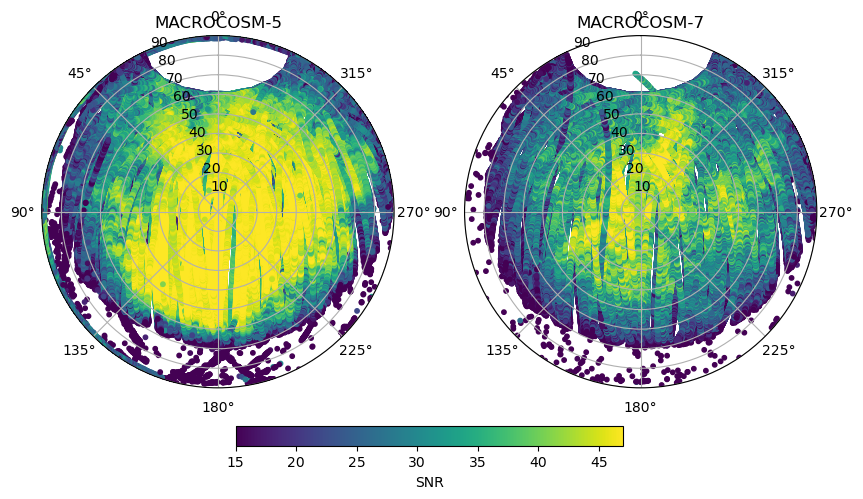

In [6]:
station_names=df.index.get_level_values('Station').unique()
clim=[15,47]

fig, ax=plt.subplots(1,len(station_names),figsize=(10,10),subplot_kw=dict(projection='polar'))
for i, iname in enumerate (station_names):
    subdf=df.xs(iname,level='Station')
    radius=90-subdf.Elevation
    theta=np.deg2rad(subdf.Azimuth)
    
    hs=ax[i].scatter(theta, radius, c=subdf.S1C,s=10)
    hs.set_clim(clim)
    ax[i].set_rlim([0,90])
    ax[i].set_theta_zero_location("N")
    ax[i].set_title(iname)
plt.colorbar(hs,ax=ax,location='bottom',shrink=0.5,pad=0.05, label='SNR')

Text(0.5, 1.0, 'R11')

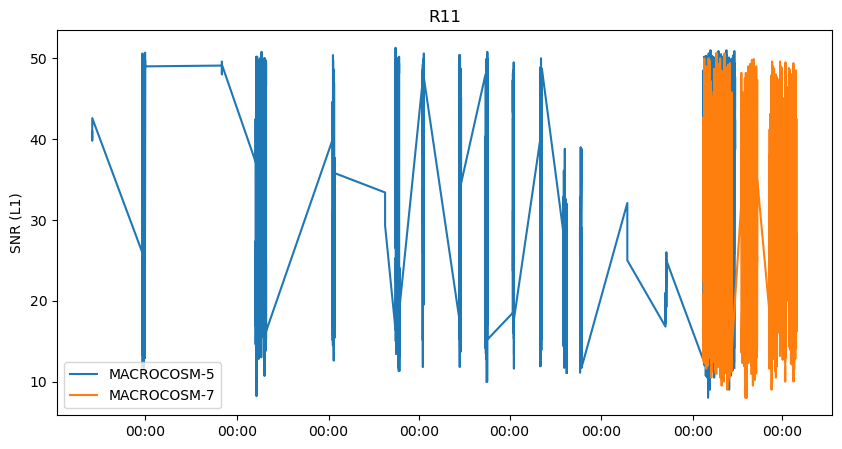

In [7]:
mySV = 'R11'
# get all sites as list
station_names = df.index.get_level_values('Station').unique()

fig, ax = plt.subplots(1,figsize=(10,5))
for i, iname in enumerate(station_names):
    # subset the dataset
    subdf = df.xs(iname,level='Station').xs(mySV,level='SV')
    # plot each measurement and color by signal to noise ratio
    hs = ax.plot(subdf.index.get_level_values('Epoch'),subdf.S1C,label=iname)
    
myFmt = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(myFmt)
ax.set_ylabel('SNR (L1)')
ax.legend()
plt.title(mySV)


In [11]:
hemi=gv.hemibuild(4)
hemi

In [12]:
hemi.grid

,azi,ele,azimin,azimax,elemin,elemax
CellID,,,,,,
0,0.000000,90.0,0.000000,360.000000,88.0,90.0
1,22.500000,86.0,0.000000,45.000000,84.0,88.0
2,67.500000,86.0,45.000000,90.000000,84.0,88.0
3,112.500000,86.0,90.000000,135.000000,84.0,88.0
4,157.500000,86.0,135.000000,180.000000,84.0,88.0
...,...,...,...,...,...,...
1523,345.789474,6.0,344.210526,347.368421,4.0,8.0
1524,348.947368,6.0,347.368421,350.526316,4.0,8.0
1525,352.105263,6.0,350.526316,353.684211,4.0,8.0


In [13]:
patches=hemi.patches()
patches

CellID
0       Rectangle(xy=(0, 0), width=6.28319, height=2, ...
1       Rectangle(xy=(0, 2), width=0.785398, height=4,...
2       Rectangle(xy=(0.785398, 2), width=0.785398, he...
3       Rectangle(xy=(1.5708, 2), width=0.785398, heig...
4       Rectangle(xy=(2.35619, 2), width=0.785398, hei...
                              ...                        
1523    Rectangle(xy=(6.00761, 82), width=0.0551157, h...
1524    Rectangle(xy=(6.06272, 82), width=0.0551157, h...
1525    Rectangle(xy=(6.11784, 82), width=0.0551157, h...
1526    Rectangle(xy=(6.17295, 82), width=0.0551157, h...
1527    Rectangle(xy=(6.22807, 82), width=0.0551157, h...
Name: Patches, Length: 1528, dtype: object

In [14]:
newdf=hemi.add_CellID(df)

In [15]:
newdf

S1C   S1X   S2C   S2X  Azimuth  \
Station     Epoch               SV                                    
MACROCOSM-5 2023-05-08 12:18:30 C11  NaN   NaN   NaN   NaN   -162.3   
                                C12  NaN   NaN   NaN   NaN     58.2   
                                C24  NaN   NaN   NaN   NaN     46.2   
                                C34  NaN   NaN   NaN   NaN   -175.4   
                                E14  NaN  46.0   NaN   NaN   -109.8   
...                                  ...   ...   ...   ...      ...   
MACROCOSM-7 2025-04-15 13:53:30 G25  NaN   NaN   NaN  22.4     32.2   
                                G31  NaN   NaN   NaN  30.5    -46.4   
                                R02  NaN   NaN   NaN  27.7    -96.7   
                                R14  NaN   NaN   NaN  29.4    -47.5   
                                R26  NaN   NaN  17.7   NaN    116.0   

                                     Elevation  CellID  
Station     Epoch               SV                      
MACROCOSM-5 2023-05-08 12:18:30 C11       52.0     389  
                                C12       67.1     127  
                                C24       54.3     290  
                                C34       74.4      65  
                                E14       68.7     108  
...                                        ...     ...  
MACROCOSM-7 2025-04-15 13:53:30 G25       30.5     781  
                                G31       14.4    1286  
                                R02       25.6     947  
                                R14       38.4     666  
                                R26       30.5     804  

[9061739 rows x 7 columns]

In [16]:
hemi_average=newdf.groupby(['CellID','Station']).mean()
hemi_average

S1C        S1X        S2C        S2X    Azimuth  \
CellID Station                                                              
0      MACROCOSM-5  47.144418  44.674016  41.143817  45.682927  18.579925   
       MACROCOSM-7  41.367602  41.283197  36.483532  39.346724  23.651710   
1      MACROCOSM-5  46.748479  45.072840  40.721951  45.089425  23.483020   
       MACROCOSM-7  43.893962  42.016859  36.672190  41.064189  20.715010   
2      MACROCOSM-5  46.397239  44.892324  41.169841  44.374689  65.992512   
...                       ...        ...        ...        ...        ...   
1523   MACROCOSM-5        NaN  25.483333        NaN        NaN -14.244444   
1524   MACROCOSM-5        NaN  25.580328        NaN        NaN -11.044444   
1525   MACROCOSM-5        NaN  27.587356        NaN        NaN  -7.761364   
1526   MACROCOSM-5        NaN  31.192174        NaN        NaN  -4.808696   
1527   MACROCOSM-5        NaN  34.715315        NaN        NaN  -1.566667   

                    Elevation  
CellID Station                 
0      MACROCOSM-5  88.635849  
       MACROCOSM-7  88.602326  
1      MACROCOSM-5  85.683922  
       MACROCOSM-7  85.825558  
2      MACROCOSM-5  86.018768  
...                       ...  
1523   MACROCOSM-5   5.300000  
1524   MACROCOSM-5   5.334921  
1525   MACROCOSM-5   5.221591  
1526   MACROCOSM-5   5.183478  
1527   MACROCOSM-5   5.296396  

[2892 rows x 6 columns]

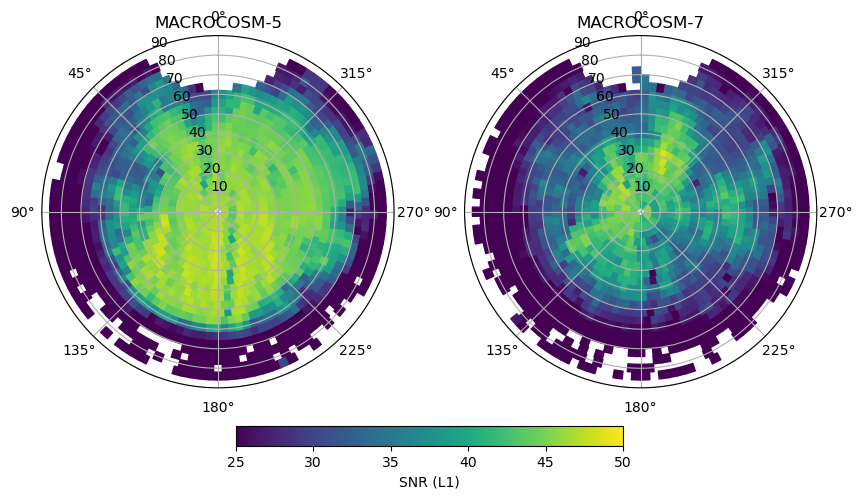

In [14]:
fig, ax = plt.subplots(1,2,figsize=(10,10),subplot_kw=dict(projection='polar'))

station_names = df.index.get_level_values('Station').unique()
for i, iname in enumerate(station_names):
    # associate the mean values to the patches, join inner will drop patches with no data, making plotting slightly faster
    ipatches = pd.concat([patches,hemi_average.xs(iname, level='Station')],join='inner',axis=1)
    # plotting with colored patches
    pc = PatchCollection(ipatches.Patches,array=ipatches.S1C,edgecolor='face', linewidth=1)
    pc.set_clim([25,50])
    ax[i].add_collection(pc)
    ax[i].set_rlim([0,90])
    ax[i].set_theta_zero_location("N")
    ax[i].set_title(iname)

plt.colorbar(pc, ax=ax, location='bottom', shrink=.5, pad=0.05, label='SNR (L1)')
#plt.savefig('figures/illustration_snr.png',facecolor='white', transparent=False,bbox_inches='tight')

mean SNR with removed NANs

In [17]:
hemi_average[['S1C', 'S1X', 'S2X']].isna().sum()
hemi_average = hemi_average.dropna(subset=['S1C','S1X','S2C','S2X'])


In [18]:
hemi_average

S1C        S1X        S2C        S2X    Azimuth  \
CellID Station                                                              
0      MACROCOSM-5  47.144418  44.674016  41.143817  45.682927  18.579925   
       MACROCOSM-7  41.367602  41.283197  36.483532  39.346724  23.651710   
1      MACROCOSM-5  46.748479  45.072840  40.721951  45.089425  23.483020   
       MACROCOSM-7  43.893962  42.016859  36.672190  41.064189  20.715010   
2      MACROCOSM-5  46.397239  44.892324  41.169841  44.374689  65.992512   
...                       ...        ...        ...        ...        ...   
1514   MACROCOSM-5  25.393968  24.775814  18.638462  22.113175 -42.585377   
1515   MACROCOSM-5  28.998213  27.980404  22.477083  25.630110 -39.081684   
       MACROCOSM-7  24.868547  24.113939  22.492754  20.743978 -39.051947   
1516   MACROCOSM-5  29.233392  28.250906  25.685841  23.968680 -36.621079   
       MACROCOSM-7  24.291131  24.212035  21.699022  20.624789 -36.647772   

                    Elevation  
CellID Station                 
0      MACROCOSM-5  88.635849  
       MACROCOSM-7  88.602326  
1      MACROCOSM-5  85.683922  
       MACROCOSM-7  85.825558  
2      MACROCOSM-5  86.018768  
...                       ...  
1514   MACROCOSM-5   6.236520  
1515   MACROCOSM-5   6.440473  
       MACROCOSM-7   6.395531  
1516   MACROCOSM-5   6.097611  
       MACROCOSM-7   6.086710  

[2075 rows x 6 columns]

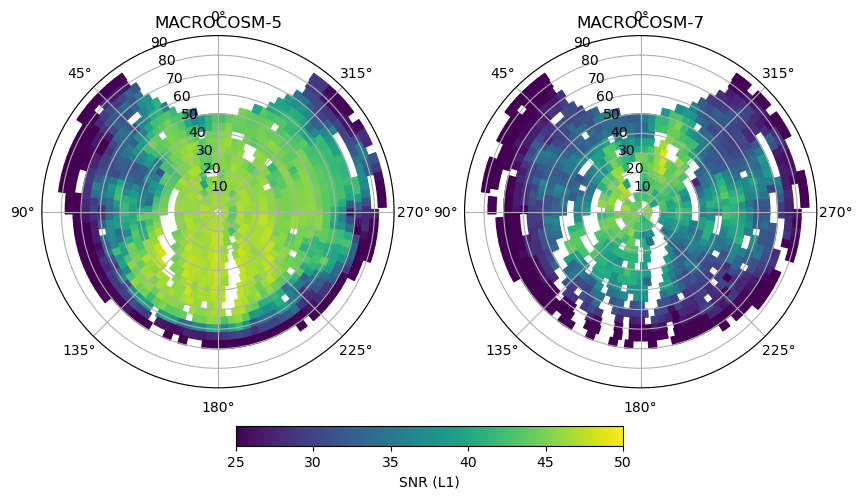

In [17]:
fig, ax = plt.subplots(1,2,figsize=(10,10),subplot_kw=dict(projection='polar'))

station_names = df.index.get_level_values('Station').unique()
for i, iname in enumerate(station_names):
    # associate the mean values to the patches, join inner will drop patches with no data, making plotting slightly faster
    ipatches = pd.concat([patches,hemi_average.xs(iname, level='Station')],join='inner',axis=1)
    # plotting with colored patches
    pc = PatchCollection(ipatches.Patches,array=ipatches.S1C,edgecolor='face', linewidth=1)
    pc.set_clim([25,50])
    ax[i].add_collection(pc)
    ax[i].set_rlim([0,90])
    ax[i].set_theta_zero_location("N")
    ax[i].set_title(iname)

plt.colorbar(pc, ax=ax, location='bottom', shrink=.5, pad=0.05, label='SNR (L1)')
#plt.savefig('figures/illustration_snr.png',facecolor='white', transparent=False,bbox_inches='tight')

In [19]:
pattern='/Volumes/coraldelmar/all_data/MACROCOSM-5.7/*.nc'
pairings={'MACROCOSM-5.7':('MACROCOSM-5','MACROCOSM-7')}
bands={'VOD1':['S1C','S1X'],'VOD2':['S2C','S2X']}
vod=gv.calc_vod(pattern,pairings,bands)
vod=vod['MACROCOSM-5.7']
vod

VOD1      VOD2  Azimuth  Elevation
Epoch               SV                                         
2025-01-14 00:00:00 C11       NaN       NaN    -71.0       14.7
                    C12       NaN       NaN    -18.4       41.6
                    C21       NaN       NaN    150.9       38.2
                    C22       NaN       NaN     82.1       36.3
                    C24       NaN       NaN   -115.8       48.2
...                           ...       ...      ...        ...
2025-01-22 23:59:30 R05  1.861875  1.456467    113.0       40.7
                    R09  2.344999  3.045454   -142.9       41.4
                    R10       NaN       NaN      NaN        NaN
                    R11       NaN  0.220617    -33.9        8.1
                    R20  0.046191  0.046191    -17.9       30.1

[2934782 rows x 4 columns]

In [20]:
vod[['VOD1','VOD2']].isna().sum()
vod = vod.dropna(subset=['VOD1','VOD2'])
vod

VOD1      VOD2  Azimuth  Elevation
Epoch               SV                                         
2025-01-14 00:00:00 G03  0.216707  0.048157     39.8       20.4
                    G06  2.670873  2.618503    -58.0       49.3
                    G11  0.293701  1.069910    -97.4       27.1
                    G14  0.313282  1.858806    166.8       65.1
                    G17  2.462272  0.396030     28.2       48.4
...                           ...       ...      ...        ...
2025-01-22 23:59:30 G14  2.037688  1.152463    169.3       46.5
                    R04 -0.706601 -1.050353     54.6       24.5
                    R05  1.861875  1.456467    113.0       40.7
                    R09  2.344999  3.045454   -142.9       41.4
                    R20  0.046191  0.046191    -17.9       30.1

[1093582 rows x 4 columns]

In [21]:
hemi=gv.hemibuild(2)
patches=hemi.patches()
vod=hemi.add_CellID(vod).drop(columns=['Azimuth','Elevation'])
vod_avg=vod.groupby(['CellID']).agg(['mean','std','count'])
vod_avg.columns=["_".join(x) for x in vod_avg.columns.to_flat_index()]
vod_avg

,VOD1_mean,VOD1_std,VOD1_count,VOD2_mean,VOD2_std,VOD2_count
CellID,,,,,,
0,1.246354,0.689843,60,1.448584,0.629191,60
1,1.031465,0.639593,304,0.947107,0.594692,304
2,0.689469,0.608732,445,0.748788,0.574172,445
3,0.622820,0.794063,470,0.556611,0.893306,470
4,1.156081,0.846886,174,1.094016,0.636529,174
...,...,...,...,...,...,...
6427,-0.017723,0.051735,8,0.010027,0.071879,8
6428,0.004483,0.032441,21,0.012097,0.037458,21
6429,0.011842,0.031491,22,0.002877,0.064023,22


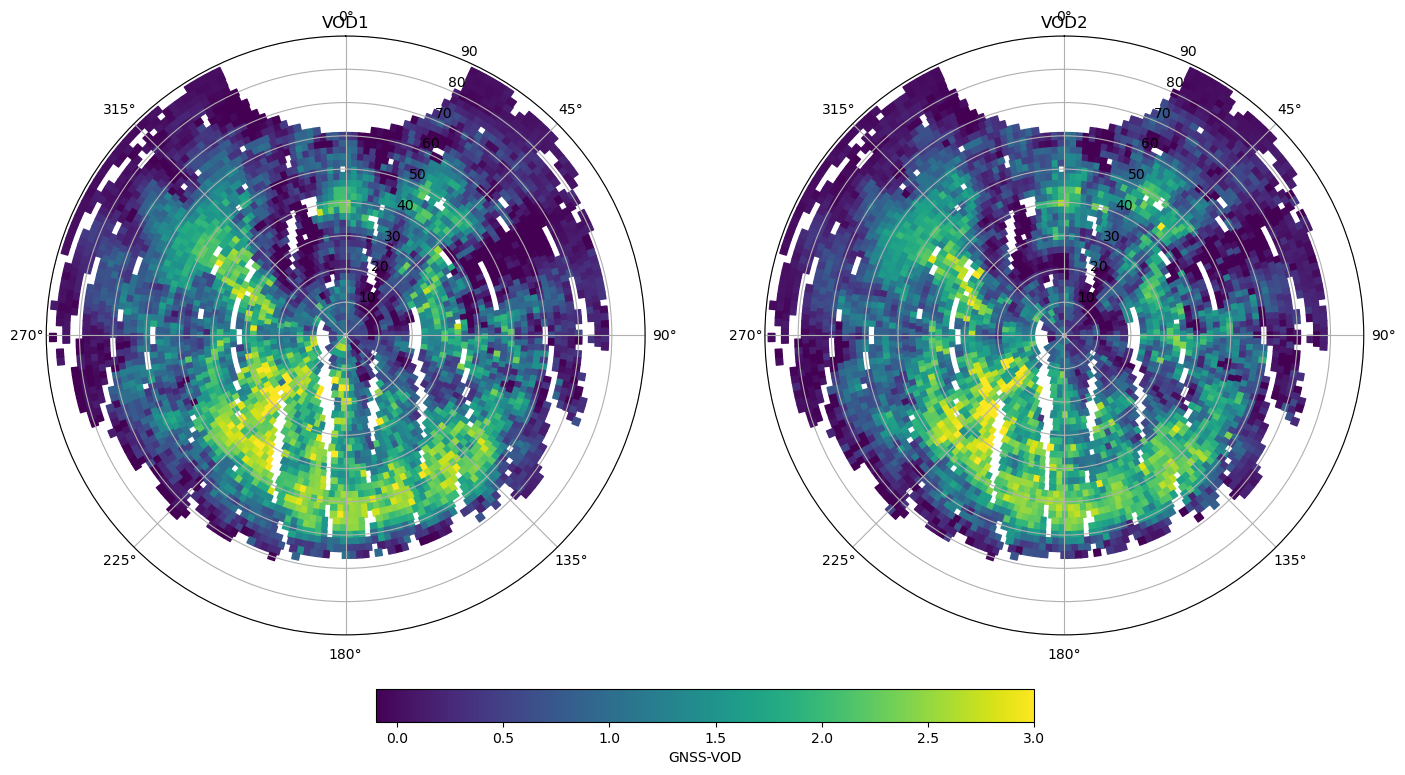

In [21]:
fig, ax = plt.subplots(1,2,figsize=(17,14),subplot_kw=dict(projection='polar'))

vod_names = ['VOD1','VOD2']
for i, iname in enumerate(vod_names):
    # associate the mean values to the patches, join inner will drop patches with no data, making plotting slightly faster
    ipatches = pd.concat([patches,vod_avg[f"{iname}_mean"]],join='inner',axis=1)
    # plotting with colored patches
    pc = PatchCollection(ipatches.Patches,array=ipatches[f"{iname}_mean"],edgecolor='face', linewidth=1)
    pc.set_clim([-0.1,3])
    ax[i].add_collection(pc)
    ax[i].set_rlim([0,90])
    ax[i].set_theta_zero_location("N")
    ax[i].set_theta_direction(-1)
    ax[i].set_title(iname)

plt.colorbar(pc, ax=ax, location='bottom', shrink=.5, pad=0.05, label='GNSS-VOD')

In [22]:
vod_anom=vod.join(vod_avg,on='CellID')
vod_anom

VOD1      VOD2  CellID  VOD1_mean  VOD1_std  \
Epoch               SV                                                     
2025-01-14 00:00:00 G03  0.216707  0.048157    4233   0.402627  0.456833   
                    G06  2.670873  2.618503    1586   2.164728  0.727324   
                    G11  0.293701  1.069910    3528   0.778574  0.481926   
                    G14  0.313282  1.858806     565   0.973331  0.612943   
                    G17  2.462272  0.396030    1621   1.521094  0.685946   
...                           ...       ...     ...        ...       ...   
2025-01-22 23:59:30 G14  2.037688  1.152463    1837   1.690427  0.588762   
                    R04 -0.706601 -1.050353    3820   0.186904  0.511228   
                    R05  1.861875  1.456467    2312   1.640272  0.713920   
                    R09  2.344999  3.045454    2189   2.659977  0.634080   
                    R20  0.046191  0.046191    3371   0.194724  0.465576   

                         VOD1_count  VOD2_mean  VOD2_std  VOD2_count  
Epoch               SV                                                
2025-01-14 00:00:00 G03         388   0.574816  0.322438         388  
                    G06         654   2.274860  0.810017         654  
                    G11         403   1.167050  0.503425         403  
                    G14         653   1.284811  0.671100         653  
                    G17         780   0.947379  0.760835         780  
...                             ...        ...       ...         ...  
2025-01-22 23:59:30 G14         517   1.298840  0.442085         517  
                    R04         316   0.188805  0.531835         316  
                    R05         360   1.735385  0.633269         360  
                    R09         540   2.365184  0.679336         540  
                    R20         711   0.400710  0.397414         711  

[1093365 rows x 9 columns]

In [23]:
vod_anom['VOD1_anom']=vod_anom['VOD1']-vod_anom['VOD1_mean']
vod_anom['VOD2_anom']=vod_anom['VOD2']-vod_anom['VOD2_mean']

In [24]:
vod_ts=vod_anom.groupby(pd.Grouper(freq='1h',level='Epoch')).mean()
vod_ts

,VOD1,VOD2,CellID,VOD1_mean,VOD1_std,VOD1_count,VOD2_mean,VOD2_std,VOD2_count,VOD1_anom,VOD2_anom
Epoch,,,,,,,,,,,
2025-01-11 17:00:00,0.783985,0.797964,2519.557447,0.897832,0.597367,404.352128,0.949555,0.578227,404.352128,-0.113846,-0.151591
2025-01-11 18:00:00,0.829577,0.834300,2577.174733,0.957475,0.560300,483.576702,0.953437,0.542366,483.576702,-0.127898,-0.119136
2025-01-11 19:00:00,0.651785,0.686678,2613.107263,0.738250,0.570595,541.441341,0.777127,0.536372,541.441341,-0.086465,-0.090449
2025-01-11 20:00:00,1.310505,1.326160,2277.372315,1.258862,0.619181,449.233890,1.282304,0.630553,449.233890,0.051643,0.043856
2025-01-11 21:00:00,1.110147,1.232831,2359.093690,1.170323,0.592926,413.699809,1.240197,0.590881,413.699809,-0.060176,-0.007366
...,...,...,...,...,...,...,...,...,...,...,...
2025-05-04 10:00:00,3.616433,3.190655,1089.121212,0.571660,0.726516,641.545455,0.891706,0.628373,641.545455,3.044773,2.298949
2025-05-04 11:00:00,0.935289,1.121700,2409.473441,0.941365,0.604757,469.297921,1.007487,0.597086,469.297921,-0.006076,0.114213
2025-05-04 12:00:00,0.911745,0.948429,2475.749759,0.939837,0.570945,438.420597,0.959348,0.594387,438.420597,-0.028091,-0.010918


In [25]:
vod_ts['VOD1_anom'] = vod_ts['VOD1_anom']+vod_ts['VOD1'].mean()
vod_ts['VOD2_anom'] = vod_ts['VOD2_anom']+vod_ts['VOD2'].mean()

Text(0.5, 1.0, 'GNSS-VOD at LUQ MAC5 ref, MAC 7 sub')

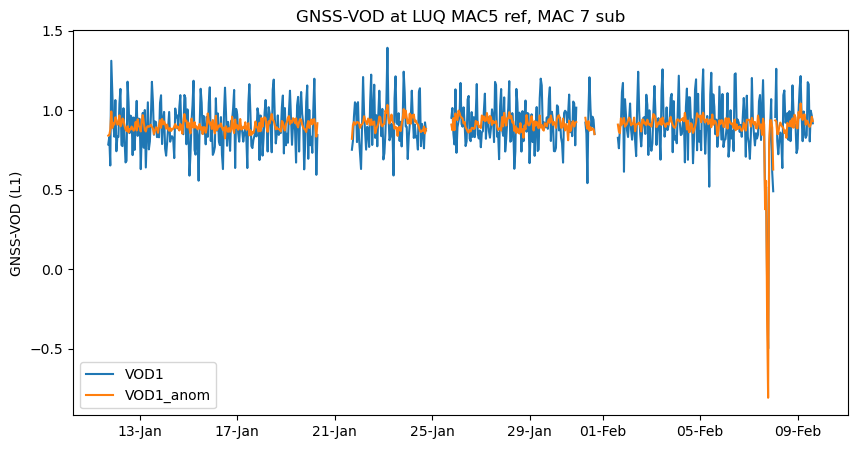

In [26]:
vod_names = ['VOD1','VOD1_anom']

fig, ax = plt.subplots(1,figsize=(10,5))
for i, iname in enumerate(vod_names): 
    # plot each measurement and color by signal to noise ratio
    hs = ax.plot(vod_ts.index.get_level_values('Epoch'),vod_ts[iname],label=iname)
    
myFmt = mdates.DateFormatter('%d-%b')
ax.xaxis.set_major_formatter(myFmt)
ax.set_ylabel('GNSS-VOD (L1)')
ax.legend()
plt.title('GNSS-VOD at LUQ MAC5 ref, MAC 7 sub')
#plt.savefig('figures/illustration_vod.png',facecolor='white', transparent=False,bbox_inches='tight')

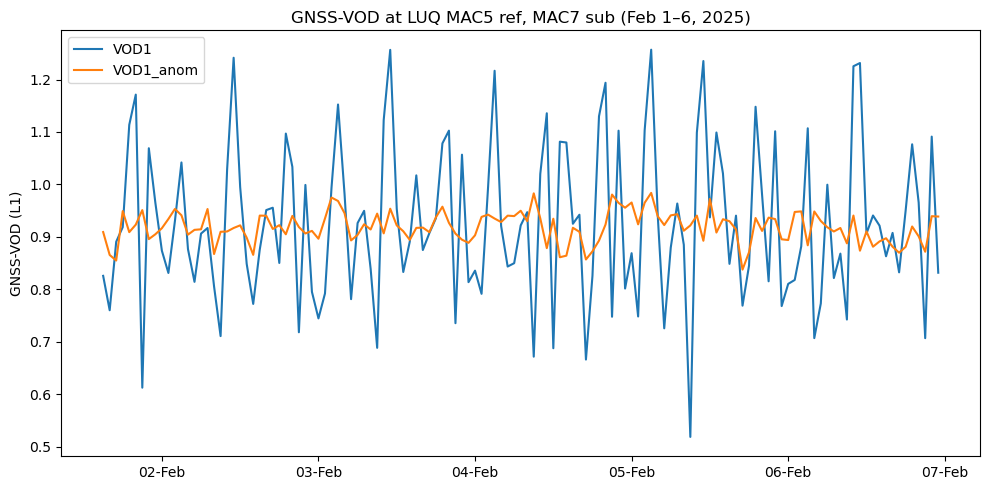

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# --- Reset index so 'Epoch' becomes a column ---
vod_df = vod_ts.reset_index()  # rename to avoid overwriting

# --- Ensure Epoch is datetime ---
vod_df['Epoch'] = pd.to_datetime(vod_df['Epoch'])

# --- Filter date range: Feb 1–6, 2025 ---
start = pd.Timestamp('2025-02-01')
end = pd.Timestamp('2025-02-06 23:59:59')
vod_filtered = vod_df[(vod_df['Epoch'] >= start) & (vod_df['Epoch'] <= end)]

# --- Plot ---
fig, ax = plt.subplots(figsize=(10, 5))

for iname in vod_names:
    ax.plot(vod_filtered['Epoch'], vod_filtered[iname], label=iname)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b'))
ax.set_ylabel('GNSS-VOD (L1)')
ax.set_title('GNSS-VOD at LUQ MAC5 ref, MAC7 sub (Feb 1–6, 2025)')
ax.legend()
plt.tight_layout()
plt.show()


Adding here 'MACROCOSM- 1.7'

In [26]:
ds17=xr.open_mfdataset('/Volumes/coraldelmar/all_data/MACROCOSM-1.7/*.nc',combine='nested',concat_dim='Epoch')
ds17

<xarray.Dataset> Size: 5GB
Dimensions:    (Station: 2, Epoch: 491069, SV: 113)
Coordinates:
  * Station    (Station) <U11 88B 'MACROCOSM-1' 'MACROCOSM-7'
  * SV         (SV) <U3 1kB 'C11' 'C12' 'C14' 'C19' ... 'R26' 'R27' 'S31' 'S33'
  * Epoch      (Epoch) datetime64[ns] 4MB 2023-01-10T19:07:30 ... 2025-04-16T...
Data variables:
    S1C        (Station, Epoch, SV) float64 888MB dask.array<chunksize=(1, 585, 15), meta=np.ndarray>
    S1X        (Station, Epoch, SV) float64 888MB dask.array<chunksize=(1, 585, 15), meta=np.ndarray>
    S2C        (Station, Epoch, SV) float64 888MB dask.array<chunksize=(1, 585, 15), meta=np.ndarray>
    S2X        (Station, Epoch, SV) float64 888MB dask.array<chunksize=(1, 585, 15), meta=np.ndarray>
    Azimuth    (Station, Epoch, SV) float64 888MB dask.array<chunksize=(1, 585, 15), meta=np.ndarray>
    Elevation  (Station, Epoch, SV) float64 888MB dask.array<chunksize=(1, 585, 15), meta=np.ndarray>

In [27]:
df17=ds17.to_dataframe().dropna(how='all').reorder_levels(["Station","Epoch","SV"]).sort_index()
df17

S1C  S1X   S2C  S2X  Azimuth  Elevation
Station     Epoch               SV                                           
MACROCOSM-1 2023-01-10 19:07:30 C35   NaN  NaN   NaN  NaN     99.5       62.1
                                G04  31.0  NaN   NaN  NaN    -76.2       58.1
                                G08  41.3  NaN   NaN  NaN   -144.5       66.0
                                G16  31.0  NaN   NaN  NaN     13.1       41.2
                                G26  27.7  NaN   NaN  NaN     48.2       21.9
...                                   ...  ...   ...  ...      ...        ...
MACROCOSM-7 2025-04-15 13:53:30 R10  31.3  NaN   NaN  NaN      NaN        NaN
                                R11  42.4  NaN  33.5  NaN    -14.7       30.9
                                R20  24.6  NaN  33.3  NaN     21.2       35.3
                                R21  43.9  NaN  34.0  NaN    -71.9       79.1
                                R22  25.7  NaN  23.5  NaN   -144.9       26.8

[13529600 rows x 6 columns]

In [28]:
hemi17=gv.hemibuild(4)
hemi17

In [29]:
hemi17.grid

,azi,ele,azimin,azimax,elemin,elemax
CellID,,,,,,
0,0.000000,90.0,0.000000,360.000000,88.0,90.0
1,22.500000,86.0,0.000000,45.000000,84.0,88.0
2,67.500000,86.0,45.000000,90.000000,84.0,88.0
3,112.500000,86.0,90.000000,135.000000,84.0,88.0
4,157.500000,86.0,135.000000,180.000000,84.0,88.0
...,...,...,...,...,...,...
1523,345.789474,6.0,344.210526,347.368421,4.0,8.0
1524,348.947368,6.0,347.368421,350.526316,4.0,8.0
1525,352.105263,6.0,350.526316,353.684211,4.0,8.0


In [30]:
patches17=hemi17.patches()
patches17

CellID
0       Rectangle(xy=(0, 0), width=6.28319, height=2, ...
1       Rectangle(xy=(0, 2), width=0.785398, height=4,...
2       Rectangle(xy=(0.785398, 2), width=0.785398, he...
3       Rectangle(xy=(1.5708, 2), width=0.785398, heig...
4       Rectangle(xy=(2.35619, 2), width=0.785398, hei...
                              ...                        
1523    Rectangle(xy=(6.00761, 82), width=0.0551157, h...
1524    Rectangle(xy=(6.06272, 82), width=0.0551157, h...
1525    Rectangle(xy=(6.11784, 82), width=0.0551157, h...
1526    Rectangle(xy=(6.17295, 82), width=0.0551157, h...
1527    Rectangle(xy=(6.22807, 82), width=0.0551157, h...
Name: Patches, Length: 1528, dtype: object

In [31]:
newdf17=hemi17.add_CellID(df17)

In [32]:
hemi_average17=newdf17.groupby(['CellID','Station']).mean()
hemi_average17

S1C        S1X        S2C        S2X    Azimuth  \
CellID Station                                                              
0      MACROCOSM-1  47.113921  44.780895  39.927688  43.932995  11.216552   
       MACROCOSM-7  41.367602  41.283197  36.483532  39.346724  23.651710   
1      MACROCOSM-1  46.257538  45.451558  39.625956  44.802361  26.972676   
       MACROCOSM-7  43.893962  42.016859  36.672190  41.064189  20.715010   
2      MACROCOSM-1  46.262241  45.303451  39.908812  45.773961  66.534639   
...                       ...        ...        ...        ...        ...   
1517   MACROCOSM-7  25.081014  24.627907  22.338285        NaN -33.344903   
1518   MACROCOSM-1  28.382425        NaN  24.494678        NaN -29.920286   
       MACROCOSM-7  23.711262        NaN  22.770662        NaN -29.913339   
1519   MACROCOSM-1  30.803395        NaN  24.937953        NaN -27.223478   
       MACROCOSM-7  24.251468        NaN  22.057117        NaN -27.175982   

                    Elevation  
CellID Station                 
0      MACROCOSM-1  88.610759  
       MACROCOSM-7  88.602326  
1      MACROCOSM-1  85.483884  
       MACROCOSM-7  85.825558  
2      MACROCOSM-1  85.840135  
...                       ...  
1517   MACROCOSM-7   6.600133  
1518   MACROCOSM-1   5.173692  
       MACROCOSM-7   5.151950  
1519   MACROCOSM-1   6.150320  
       MACROCOSM-7   6.160979  

[2886 rows x 6 columns]

In [33]:
hemi_average17[['S1C', 'S1X', 'S2X']].isna().sum()
hemi_average17 = hemi_average17.dropna(subset=['S1C','S1X','S2C','S2X'])


In [34]:
hemi_average17

S1C        S1X        S2C        S2X    Azimuth  \
CellID Station                                                              
0      MACROCOSM-1  47.113921  44.780895  39.927688  43.932995  11.216552   
       MACROCOSM-7  41.367602  41.283197  36.483532  39.346724  23.651710   
1      MACROCOSM-1  46.257538  45.451558  39.625956  44.802361  26.972676   
       MACROCOSM-7  43.893962  42.016859  36.672190  41.064189  20.715010   
2      MACROCOSM-1  46.262241  45.303451  39.908812  45.773961  66.534639   
...                       ...        ...        ...        ...        ...   
1514   MACROCOSM-1  36.865526  35.091018  30.251656  30.820525 -42.671247   
1515   MACROCOSM-1  31.951025  30.572682  26.032344  27.639470 -39.243666   
       MACROCOSM-7  24.860633  24.113939  22.564789  20.743978 -39.052542   
1516   MACROCOSM-1  29.804946  28.078779  24.542621  25.080683 -36.645934   
       MACROCOSM-7  24.248189  24.212035  21.703119  20.624789 -36.647359   

                    Elevation  
CellID Station                 
0      MACROCOSM-1  88.610759  
       MACROCOSM-7  88.602326  
1      MACROCOSM-1  85.483884  
       MACROCOSM-7  85.825558  
2      MACROCOSM-1  85.840135  
...                       ...  
1514   MACROCOSM-1   5.991284  
1515   MACROCOSM-1   6.212263  
       MACROCOSM-7   6.393630  
1516   MACROCOSM-1   5.996787  
       MACROCOSM-7   6.088082  

[2089 rows x 6 columns]

In [35]:
pattern='/Volumes/coraldelmar/all_data/MACROCOSM-1.7/*.nc'
pairings={'MACROCOSM-1.7':('MACROCOSM-1','MACROCOSM-7')}
bands={'VOD1':['S1C','S1X'],'VOD2':['S2C','S2X']}
vod17=gv.calc_vod(pattern,pairings,bands)
vod17=vod17['MACROCOSM-1.7']
vod17

VOD1      VOD2  Azimuth  Elevation
Epoch               SV                                         
2025-01-15 00:00:00 C19       NaN       NaN     87.6       39.6
                    C26       NaN       NaN   -104.3       44.6
                    C35       NaN       NaN      0.7       44.3
                    E10 -0.492157       NaN     25.6       32.3
                    E11 -0.498913       NaN     -4.3       50.7
...                           ...       ...      ...        ...
2025-04-15 13:53:30 R10       NaN       NaN      NaN        NaN
                    R11  0.567587  0.508463    -14.7       30.9
                    R20  1.503540  0.851562     21.2       35.3
                    R21  0.904417  1.334016    -71.9       79.1
                    R22  0.020764       NaN   -144.9       26.8

[151915 rows x 4 columns]

In [36]:
vod17[['VOD1','VOD2']].isna().sum()
vod17 = vod17.dropna(subset=['VOD1','VOD2'])
vod17

VOD1      VOD2  Azimuth  Elevation
Epoch               SV                                         
2025-01-15 00:00:00 G14 -2.664728 -2.521243    167.3       62.9
2025-01-15 00:00:30 G14 -3.110098 -2.966869    167.4       62.7
2025-01-15 00:01:00 G14 -2.795566 -2.571105    167.4       62.4
2025-01-15 00:01:30 G14 -2.016455 -2.281242    167.5       62.2
2025-01-15 00:02:00 G14 -1.421821 -2.965511    167.5       61.9
...                           ...       ...      ...        ...
2025-04-15 13:53:30 G30  1.601875  1.430246    -47.5       38.4
                    R09  0.222044  1.916586    116.0       30.5
                    R11  0.567587  0.508463    -14.7       30.9
                    R20  1.503540  0.851562     21.2       35.3
                    R21  0.904417  1.334016    -71.9       79.1

[43736 rows x 4 columns]

In [37]:
hemi17=gv.hemibuild(2)
patches17=hemi17.patches()
vod17=hemi17.add_CellID(vod17).drop(columns=['Azimuth','Elevation'])
vod_avg17=vod17.groupby(['CellID']).agg(['mean','std','count'])
vod_avg17.columns=["_".join(x) for x in vod_avg17.columns.to_flat_index()]
vod_avg17

,VOD1_mean,VOD1_std,VOD1_count,VOD2_mean,VOD2_std,VOD2_count
CellID,,,,,,
1,-0.429390,1.899125,6,-0.885587,3.171546,6
2,-0.725759,2.201320,11,-1.271742,2.727838,11
3,-1.077107,2.403917,12,-1.997374,2.878363,12
4,1.472119,0.293858,3,1.134694,0.334973,3
9,-1.061226,2.049785,9,-2.270261,2.730928,9
...,...,...,...,...,...,...
6412,0.014467,NaN,1,0.004822,NaN,1
6420,0.059149,NaN,1,0.009001,NaN,1
6421,0.127738,NaN,1,0.004099,NaN,1


In [38]:
vod_anom17=vod17.join(vod_avg17,on='CellID')
vod_anom17

VOD1      VOD2  CellID  VOD1_mean  VOD1_std  \
Epoch               SV                                                     
2025-01-15 00:00:00 G14 -2.664728 -2.521243     765  -2.272113  0.603818   
2025-01-15 00:00:30 G14 -3.110098 -2.966869     765  -2.272113  0.603818   
2025-01-15 00:01:00 G14 -2.795566 -2.571105     765  -2.272113  0.603818   
2025-01-15 00:01:30 G14 -2.016455 -2.281242     765  -2.272113  0.603818   
2025-01-15 00:02:00 G14 -1.421821 -2.965511     765  -2.272113  0.603818   
...                           ...       ...     ...        ...       ...   
2025-04-15 13:53:30 G30  1.601875  1.430246    2590   1.029342  1.041390   
                    R09  0.222044  1.916586    3246   0.912069  0.529135   
                    R11  0.567587  0.508463    3372   0.581041  0.747189   
                    R20  1.503540  0.851562    2624   1.638140  0.700187   
                    R21  0.904417  1.334016     113  -0.440903  1.902571   

                         VOD1_count  VOD2_mean  VOD2_std  VOD2_count  
Epoch               SV                                                
2025-01-15 00:00:00 G14          15  -2.521424  0.465510          15  
2025-01-15 00:00:30 G14          15  -2.521424  0.465510          15  
2025-01-15 00:01:00 G14          15  -2.521424  0.465510          15  
2025-01-15 00:01:30 G14          15  -2.521424  0.465510          15  
2025-01-15 00:02:00 G14          15  -2.521424  0.465510          15  
...                             ...        ...       ...         ...  
2025-04-15 13:53:30 G30          29   0.728145  1.546886          29  
                    R09          14   1.115471  0.526768          14  
                    R11          53   0.470907  0.729308          53  
                    R20          32   0.927609  0.919598          32  
                    R21           2   0.248715  1.534847           2  

[43734 rows x 9 columns]

In [39]:
vod_anom17['VOD1_anom']=vod_anom17['VOD1']-vod_anom17['VOD1_mean']
vod_anom17['VOD2_anom']=vod_anom17['VOD2']-vod_anom17['VOD2_mean']

In [40]:
vod_ts17=vod_anom17.groupby(pd.Grouper(freq='1h',level='Epoch')).mean()
vod_ts17

,VOD1,VOD2,CellID,VOD1_mean,VOD1_std,VOD1_count,VOD2_mean,VOD2_std,VOD2_count,VOD1_anom,VOD2_anom
Epoch,,,,,,,,,,,
2025-01-14 14:00:00,-0.346178,-0.704333,2227.127273,0.472386,0.942250,21.000000,0.312744,1.195012,21.000000,-0.818565,-1.017077
2025-01-14 15:00:00,1.167879,1.082910,2643.215063,1.018815,0.777940,26.175732,0.858127,0.885941,26.175732,0.149064,0.224784
2025-01-14 16:00:00,1.087038,0.982540,2440.420290,0.806735,0.751519,22.624799,0.593748,0.897890,22.624799,0.280303,0.388792
2025-01-14 17:00:00,0.953870,0.826992,2511.288404,0.525553,0.857907,23.116717,0.288103,1.027856,23.116717,0.428317,0.538889
2025-01-14 18:00:00,0.420941,0.141246,2400.939261,0.584605,0.837338,24.614437,0.330261,0.944669,24.614437,-0.163664,-0.189015
...,...,...,...,...,...,...,...,...,...,...,...
2025-04-15 09:00:00,1.410447,1.288302,2943.954043,1.032291,0.716157,26.694468,0.866331,0.824487,26.694468,0.378156,0.421970
2025-04-15 10:00:00,1.349122,1.221990,2644.256158,0.898021,0.746283,22.746305,0.732568,0.844611,22.746305,0.451100,0.489422
2025-04-15 11:00:00,1.061829,1.042759,2681.846214,0.641862,0.771864,18.608899,0.463940,0.910222,18.608899,0.419967,0.578819


In [41]:
vod_ts17['VOD1_anom'] = vod_ts17['VOD1_anom']+vod_ts17['VOD1'].mean()
vod_ts17['VOD2_anom'] = vod_ts17['VOD2_anom']+vod_ts17['VOD2'].mean()

In [42]:
vod_ts17['VOD1'].mean()

0.036170475221689556

Text(0.5, 1.0, 'GNSS-VOD at LUQ MAC5 ref, MAC 7 sub')

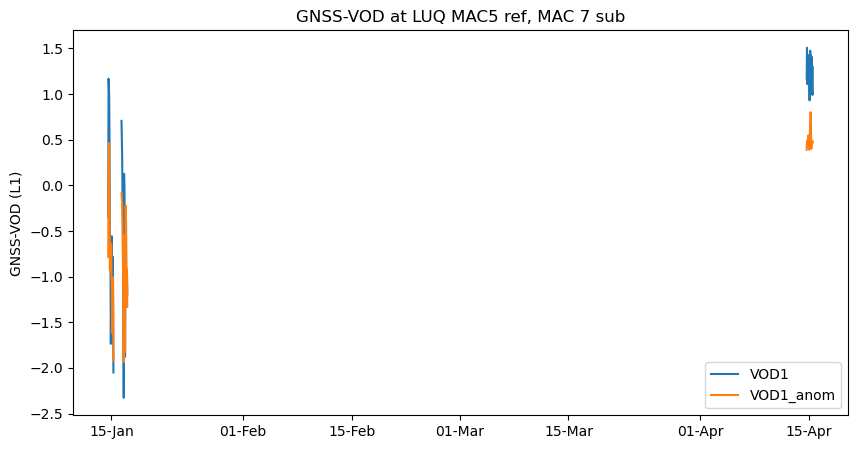

In [44]:
vod_names = ['VOD1','VOD1_anom']

fig, ax = plt.subplots(1,figsize=(10,5))
for i, iname in enumerate(vod_names): 
    # plot each measurement and color by signal to noise ratio
    hs = ax.plot(vod_ts17.index.get_level_values('Epoch'),vod_ts17[iname],label=iname)
    
myFmt = mdates.DateFormatter('%d-%b')
ax.xaxis.set_major_formatter(myFmt)
ax.set_ylabel('GNSS-VOD (L1)')
ax.legend()
plt.title('GNSS-VOD at LUQ MAC5 ref, MAC 7 sub')

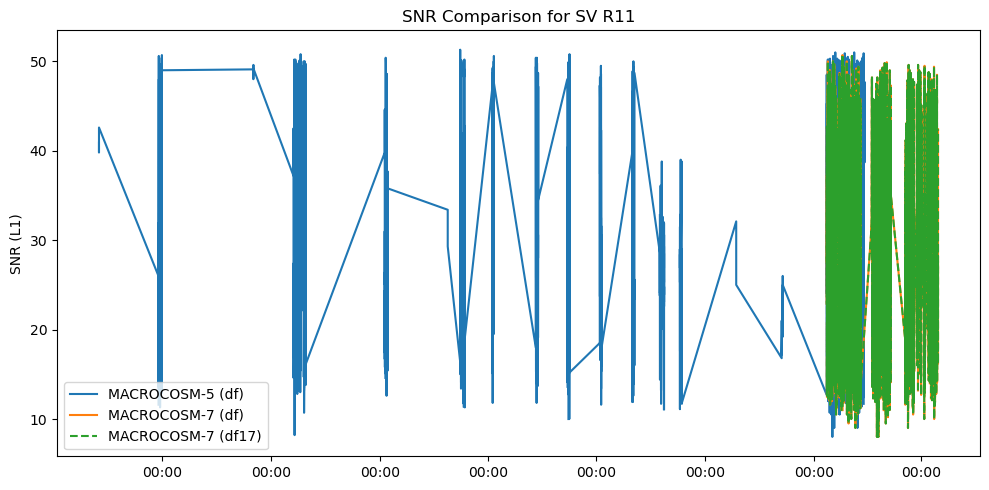

In [45]:
mySV = 'R11'
station_names = df.index.get_level_values('Station').unique()

fig, ax = plt.subplots(1, figsize=(10, 5))

for i, iname in enumerate(station_names):
    # subset original df
    subdf = df.xs(iname, level='Station').xs(mySV, level='SV')
    ax.plot(subdf.index.get_level_values('Epoch'), subdf['S1C'], label=f'{iname} (df)', linestyle='-')

    # subset df17
    if iname in df17.index.get_level_values('Station'):
        try:
            subdf17 = df17.xs(iname, level='Station').xs(mySV, level='SV')
            ax.plot(subdf17.index.get_level_values('Epoch'), subdf17['S1C'], label=f'{iname} (df17)', linestyle='--')
        except KeyError:
            pass  # skip if mySV doesn't exist in df17 for this station

# formatting
myFmt = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(myFmt)
ax.set_ylabel('SNR (L1)')
ax.legend()
plt.title(f'SNR Comparison for SV {mySV}')
plt.tight_layout()
plt.show()


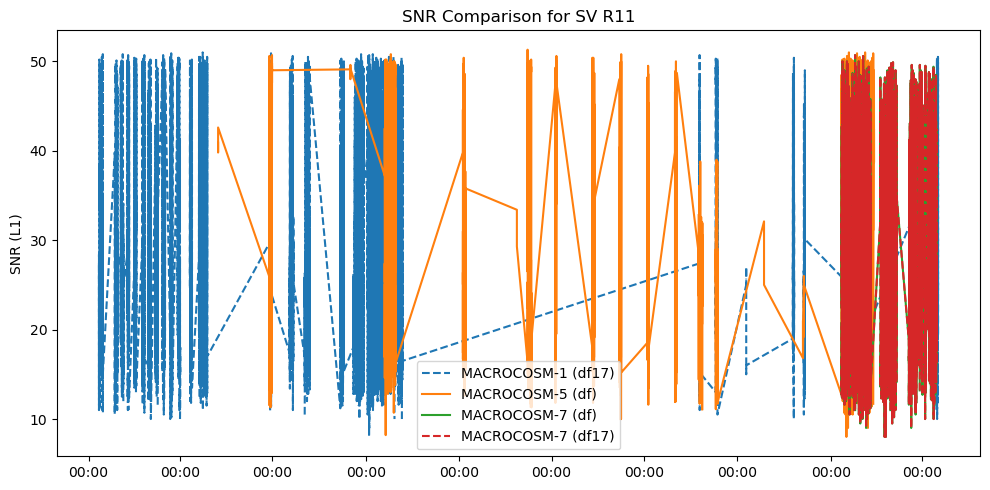

In [46]:
mySV = 'R11'

# Union of station names from both DataFrames
stations_df = df.index.get_level_values('Station').unique()
stations_df17 = df17.index.get_level_values('Station').unique()
all_stations = stations_df.union(stations_df17)

fig, ax = plt.subplots(1, figsize=(10, 5))

for iname in all_stations:
    # Plot df if available
    try:
        subdf = df.xs(iname, level='Station').xs(mySV, level='SV')
        ax.plot(subdf.index.get_level_values('Epoch'), subdf['S1C'], label=f'{iname} (df)', linestyle='-')
    except KeyError:
        pass

    # Plot df17 if available
    try:
        subdf17 = df17.xs(iname, level='Station').xs(mySV, level='SV')
        ax.plot(subdf17.index.get_level_values('Epoch'), subdf17['S1C'], label=f'{iname} (df17)', linestyle='--')
    except KeyError:
        pass

# Format the x-axis
myFmt = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(myFmt)
ax.set_ylabel('SNR (L1)')
ax.legend()
plt.title(f'SNR Comparison for SV {mySV}')
plt.tight_layout()
plt.show()


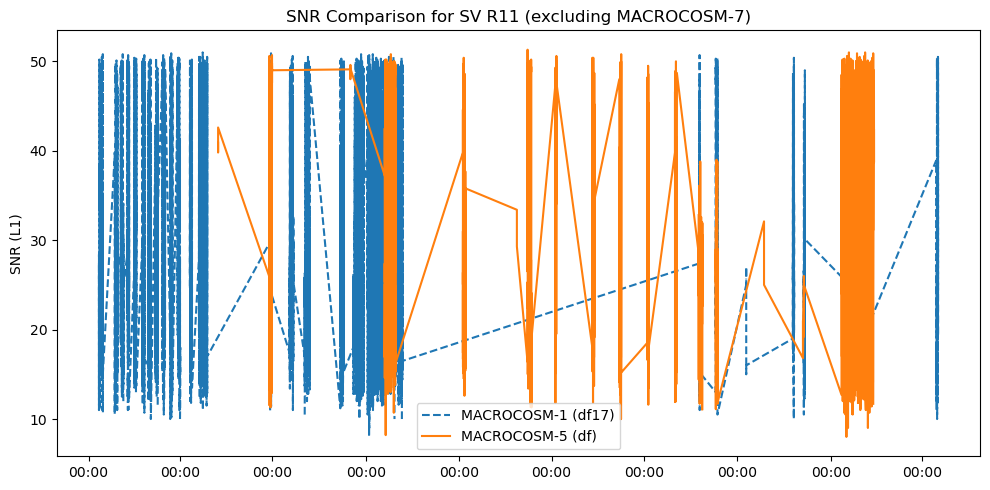

In [47]:
mySV = 'R11'

# Union of station names from both DataFrames
stations_df = df.index.get_level_values('Station').unique()
stations_df17 = df17.index.get_level_values('Station').unique()
all_stations = stations_df.union(stations_df17)

# Exclude MACROCOSM-7
stations_to_plot = [s for s in all_stations if s != 'MACROCOSM-7']

fig, ax = plt.subplots(1, figsize=(10, 5))

for iname in stations_to_plot:
    # Plot df if available
    try:
        subdf = df.xs(iname, level='Station').xs(mySV, level='SV')
        ax.plot(subdf.index.get_level_values('Epoch'), subdf['S1C'], label=f'{iname} (df)', linestyle='-')
    except KeyError:
        pass

    # Plot df17 if available
    try:
        subdf17 = df17.xs(iname, level='Station').xs(mySV, level='SV')
        ax.plot(subdf17.index.get_level_values('Epoch'), subdf17['S1C'], label=f'{iname} (df17)', linestyle='--')
    except KeyError:
        pass

# Format the x-axis
myFmt = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(myFmt)
ax.set_ylabel('SNR (L1)')
ax.legend()
plt.title(f'SNR Comparison for SV {mySV} (excluding MACROCOSM-7)')
plt.tight_layout()
plt.show()


In [48]:
#looking for common satellites

In [49]:
# Unique SVs in each dataset
svs_df = df.index.get_level_values('SV').unique()
svs_df17 = df17.index.get_level_values('SV').unique()

# Intersection = shared satellites
shared_svs = svs_df.intersection(svs_df17)
print("🛰️ Shared SVs:", shared_svs.tolist())


🛰️ Shared SVs: ['C11', 'C12', 'C24', 'C34', 'E14', 'G02', 'G04', 'G07', 'G08', 'G09', 'G16', 'G21', 'G27', 'R02', 'R11', 'R12', 'R21', 'R22', 'R23', 'C25', 'E13', 'E21', 'R25', 'E15', 'E27', 'C28', 'E10', 'G06', 'G11', 'G14', 'G17', 'G19', 'G20', 'R03', 'R15', 'R16', 'R17', 'C33', 'E31', 'G12', 'R01', 'E24', 'R18', 'C27', 'E04', 'E12', 'G05', 'G13', 'G15', 'G29', 'R04', 'R05', 'R19', 'C32', 'E19', 'C30', 'G03', 'R09', 'C21', 'E33', 'E26', 'C23', 'G01', 'C14', 'R20', 'R10', 'E20', 'C37', 'G25', 'R06', 'E11', 'E25', 'R07', 'G30', 'E09', 'G18', 'G23', 'R08', 'G24', 'E36', 'C20', 'E05', 'G10', 'G32', 'C29', 'R24', 'E34', 'G28', 'G22', 'C19', 'G31', 'E03', 'R13', 'C36', 'G26', 'C22', 'E02', 'R14', 'E08', 'E30', 'E07', 'C26', 'C35', 'E18', 'R26', 'E06', 'E29', 'E16', 'E23', 'R27']


In [50]:
# Convert Epoch to just dates
dates_df = df.index.get_level_values('Epoch').normalize().unique()
dates_df17 = df17.index.get_level_values('Epoch').normalize().unique()

# Intersection = shared dates
shared_dates = dates_df.intersection(dates_df17)
print("📅 Shared Dates:", shared_dates.strftime('%Y-%m-%d').tolist())


📅 Shared Dates: ['2023-06-27', '2023-06-28', '2023-06-29', '2023-06-30', '2023-10-19', '2023-10-23', '2023-10-24', '2023-10-25', '2023-10-26', '2023-10-27', '2023-10-28', '2023-10-29', '2023-10-30', '2024-08-24', '2024-08-25', '2024-09-09', '2024-09-10', '2024-09-11', '2024-12-05', '2024-12-06', '2025-01-11', '2025-01-12', '2025-01-13', '2025-01-14', '2025-01-15', '2025-01-16', '2025-01-17', '2025-01-18', '2025-01-19', '2025-01-20', '2025-01-21', '2025-01-22', '2025-01-23', '2025-01-24', '2025-01-25', '2025-01-26', '2025-01-27', '2025-01-28', '2025-01-29', '2025-01-30', '2025-01-31', '2025-02-01', '2025-02-02', '2025-02-03', '2025-02-04', '2025-02-05', '2025-02-06', '2025-02-07', '2025-02-08', '2025-02-09', '2025-02-18', '2025-02-19', '2025-02-20', '2025-02-21', '2025-02-22', '2025-02-23', '2025-02-24', '2025-02-25', '2025-02-26', '2025-02-27', '2025-02-28', '2025-03-01', '2025-03-02', '2025-03-03', '2025-03-04', '2025-03-05', '2025-03-06', '2025-03-18', '2025-03-19', '2025-03-20', '20

In [51]:
# Get SVs with at least one valid S1C in each DataFrame
valid_svs_df = df.reset_index().dropna(subset=['S1C'])['SV'].unique()
valid_svs_df17 = df17.reset_index().dropna(subset=['S1C'])['SV'].unique()

# Intersection: SVs present in both and have valid data
shared_valid_svs = pd.Index(valid_svs_df).intersection(valid_svs_df17)
print("✅ Shared SVs with valid S1C data:", shared_valid_svs.tolist())


✅ Shared SVs with valid S1C data: ['G02', 'G04', 'G07', 'G08', 'G09', 'G16', 'G21', 'G27', 'R02', 'R11', 'R12', 'R21', 'R22', 'R23', 'R25', 'G06', 'G11', 'G14', 'G17', 'G19', 'G20', 'R03', 'R15', 'R16', 'R17', 'G12', 'R01', 'R18', 'G05', 'G13', 'G15', 'G29', 'R04', 'R05', 'R19', 'G03', 'R09', 'G01', 'R20', 'R10', 'G25', 'R06', 'R07', 'G30', 'G18', 'G23', 'R08', 'G24', 'G10', 'G32', 'R24', 'G28', 'G22', 'G31', 'R13', 'G26', 'R14', 'R26', 'R27']


In [52]:
# Get dates with valid S1C in df
dates_df = df.reset_index().dropna(subset=['S1C'])
dates_df = pd.to_datetime(dates_df['Epoch']).dt.normalize().unique()

# Get dates with valid S1C in df17
dates_df17 = df17.reset_index().dropna(subset=['S1C'])
dates_df17 = pd.to_datetime(dates_df17['Epoch']).dt.normalize().unique()

# Shared valid dates
shared_valid_dates = pd.Index(dates_df).intersection(dates_df17)
print("📆 Shared dates with valid S1C data:", shared_valid_dates.strftime('%Y-%m-%d').tolist())


📆 Shared dates with valid S1C data: ['2023-06-27', '2023-06-28', '2023-06-29', '2023-06-30', '2023-10-19', '2023-10-23', '2023-10-24', '2023-10-25', '2023-10-26', '2023-10-27', '2023-10-28', '2023-10-29', '2023-10-30', '2024-08-24', '2024-08-25', '2024-09-09', '2024-09-10', '2024-09-11', '2024-12-05', '2024-12-06', '2025-01-11', '2025-01-12', '2025-01-13', '2025-01-14', '2025-01-15', '2025-01-16', '2025-01-17', '2025-01-18', '2025-01-19', '2025-01-20', '2025-01-21', '2025-01-22', '2025-01-23', '2025-01-24', '2025-01-25', '2025-01-26', '2025-01-27', '2025-01-28', '2025-01-29', '2025-01-30', '2025-01-31', '2025-02-01', '2025-02-02', '2025-02-03', '2025-02-04', '2025-02-05', '2025-02-06', '2025-02-07', '2025-02-08', '2025-02-09', '2025-02-18', '2025-02-19', '2025-02-20', '2025-02-21', '2025-02-22', '2025-02-23', '2025-02-24', '2025-02-25', '2025-02-26', '2025-02-27', '2025-02-28', '2025-03-01', '2025-03-02', '2025-03-03', '2025-03-04', '2025-03-05', '2025-03-06', '2025-03-18', '2025-03-19

In [53]:
# List of target dates
target_dates = [
    '2025-01-11', '2025-01-12', '2025-01-13', '2025-01-14', '2025-01-15',
    '2025-01-16', '2025-01-17', '2025-01-18', '2025-01-19', '2025-01-20',
    '2025-01-21', '2025-01-22', '2025-01-23', '2025-01-24', '2025-01-25',
    '2025-01-26', '2025-01-27', '2025-01-28', '2025-01-29', '2025-01-30',
    '2025-01-31', '2025-02-01', '2025-02-02', '2025-02-03', '2025-02-04',
    '2025-02-05', '2025-02-06', '2025-02-07', '2025-02-08', '2025-02-09',
    '2025-02-18', '2025-02-19', '2025-02-20', '2025-02-21', '2025-02-22',
    '2025-02-23', '2025-02-24', '2025-02-25', '2025-02-26', '2025-02-27',
    '2025-02-28', '2025-03-01', '2025-03-02', '2025-03-03', '2025-03-04',
    '2025-03-05', '2025-03-06', '2025-03-18', '2025-03-19', '2025-03-20',
    '2025-03-21', '2025-03-22', '2025-03-23', '2025-03-24', '2025-03-25',
    '2025-03-26', '2025-03-27', '2025-03-28', '2025-03-29', '2025-03-30',
    '2025-03-31', '2025-04-01', '2025-04-03', '2025-04-04', '2025-04-06',
    '2025-04-07', '2025-04-08', '2025-04-09', '2025-04-10', '2025-04-11',
    '2025-04-12', '2025-04-13', '2025-04-14', '2025-04-15'
]
target_dates = pd.to_datetime(target_dates)

# Function to filter a DataFrame
def filter_s1c_by_dates(df, target_dates):
    # Ensure index is datetime
    df = df.copy()
    df.index = df.index.set_levels(
        pd.to_datetime(df.index.levels[df.index.names.index('Epoch')]),
        level='Epoch'
    )

    # Normalize Epoch to get just the date
    date_index = df.index.get_level_values('Epoch').normalize()

    # Filter for target dates and non-NA S1C
    return df[(date_index.isin(target_dates)) & (df['S1C'].notna())]

# Example usage:
filtered_df = filter_s1c_by_dates(df, target_dates)
filtered_df17 = filter_s1c_by_dates(df17, target_dates)


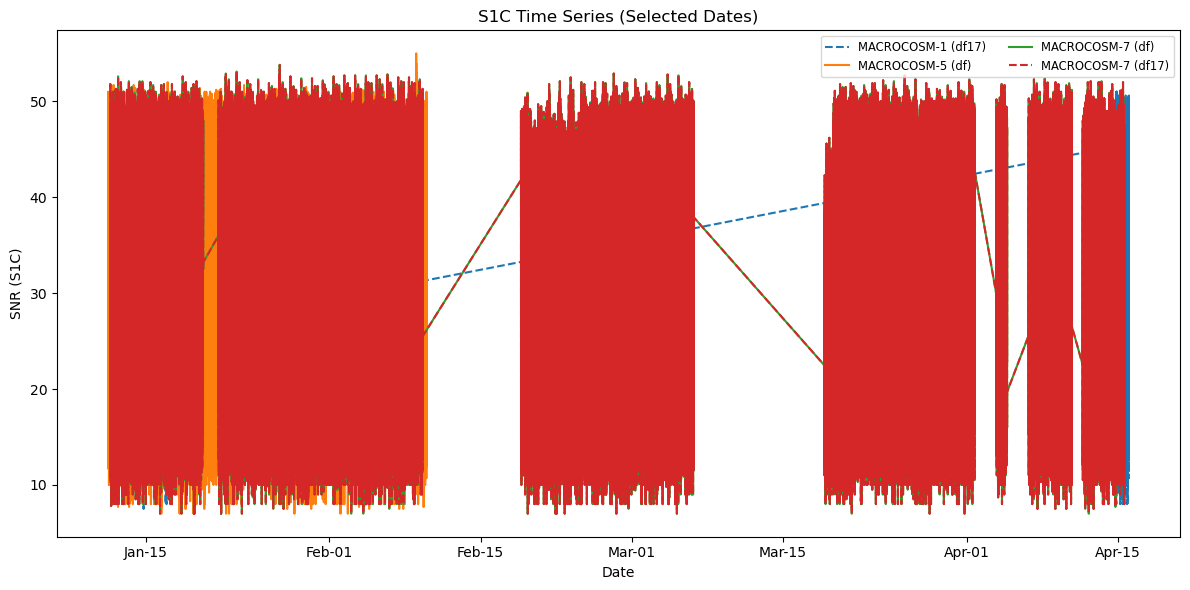

In [54]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# --- Plot setup ---
fig, ax = plt.subplots(figsize=(12, 6))

# Get all stations in both
stations = filtered_df.index.get_level_values('Station').unique().union(
    filtered_df17.index.get_level_values('Station').unique()
)

# Loop over stations
for station in stations:
    # df plot
    try:
        sub_df = filtered_df.xs(station, level='Station')
        ax.plot(
            sub_df.index.get_level_values('Epoch'),
            sub_df['S1C'],
            label=f'{station} (df)',
            linestyle='-'
        )
    except KeyError:
        pass

    # df17 plot
    try:
        sub_df17 = filtered_df17.xs(station, level='Station')
        ax.plot(
            sub_df17.index.get_level_values('Epoch'),
            sub_df17['S1C'],
            label=f'{station} (df17)',
            linestyle='--'
        )
    except KeyError:
        pass

# --- Formatting ---
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%d'))
ax.set_xlabel('Date')
ax.set_ylabel('SNR (S1C)')
ax.set_title('S1C Time Series (Selected Dates)')
ax.legend(ncol=2, fontsize='small', loc='upper right')
plt.tight_layout()
plt.show()


In [55]:
# Subset your target dates to just January
jan_dates = [d for d in target_dates if d.month == 1]


In [56]:
# Get all valid SVs in each
valid_svs_df = df.reset_index().dropna(subset=['S1C'])['SV'].unique()
valid_svs_df17 = df17.reset_index().dropna(subset=['S1C'])['SV'].unique()

# Shared valid SVs
shared_valid_svs = pd.Index(valid_svs_df).intersection(valid_svs_df17)

# Pick the first one (or change manually)
sv_to_plot = shared_valid_svs[0]
print("📡 Plotting SV:", sv_to_plot)


📡 Plotting SV: G02


In [57]:
# Define January 14–16, 2025 as datetime objects
jan_window = pd.date_range(start='2025-01-14', end='2025-01-16')


In [58]:
def filter_by_dates_and_sv(df, dates, sv):
    df = df.copy()
    df.index = df.index.set_levels(
        pd.to_datetime(df.index.levels[df.index.names.index('Epoch')]),
        level='Epoch'
    )
    date_mask = df.index.get_level_values('Epoch').normalize().isin(dates)
    sv_mask = df.index.get_level_values('SV') == sv
    return df[date_mask & sv_mask & df['S1C'].notna()]

filtered_window_df = filter_by_dates_and_sv(df, jan_window, sv_to_plot)
filtered_window_df17 = filter_by_dates_and_sv(df17, jan_window, sv_to_plot)


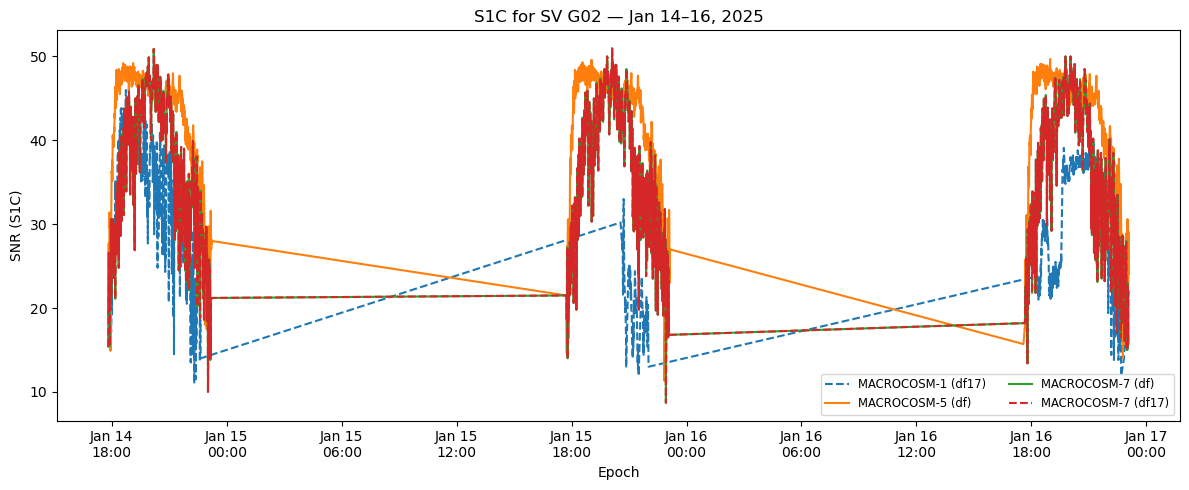

In [59]:
fig, ax = plt.subplots(figsize=(12, 5))

stations = filtered_window_df.index.get_level_values('Station').unique().union(
    filtered_window_df17.index.get_level_values('Station').unique()
)

for station in stations:
    try:
        sub_df = filtered_window_df.xs((station, sv_to_plot), level=('Station', 'SV'))
        ax.plot(sub_df.index.get_level_values('Epoch'), sub_df['S1C'],
                label=f'{station} (df)', linestyle='-')
    except KeyError:
        pass

    try:
        sub_df17 = filtered_window_df17.xs((station, sv_to_plot), level=('Station', 'SV'))
        ax.plot(sub_df17.index.get_level_values('Epoch'), sub_df17['S1C'],
                label=f'{station} (df17)', linestyle='--')
    except KeyError:
        pass

ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d\n%H:%M'))
ax.set_title(f'S1C for SV {sv_to_plot} — Jan 14–16, 2025')
ax.set_ylabel('SNR (S1C)')
ax.set_xlabel('Epoch')
ax.legend(fontsize='small', ncol=2)
plt.tight_layout()
plt.show()


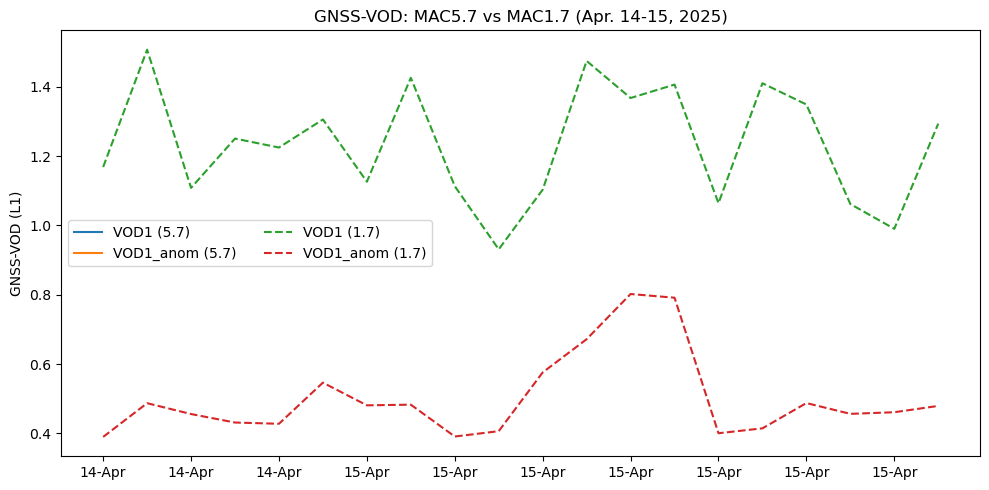

In [60]:
# --- Reset index and ensure datetime ---
vod_df = vod_ts.reset_index()
vod_df['Epoch'] = pd.to_datetime(vod_df['Epoch'])

vod_df17 = vod_ts17.reset_index()
vod_df17['Epoch'] = pd.to_datetime(vod_df17['Epoch'])

# --- Filter date range: Feb 1–6, 2025 ---
start = pd.Timestamp('2025-04-01')
end = pd.Timestamp('2025-04-16 23:59:59')

vod_filtered = vod_df[(vod_df['Epoch'] >= start) & (vod_df['Epoch'] <= end)]
vod_filtered17 = vod_df17[(vod_df17['Epoch'] >= start) & (vod_df17['Epoch'] <= end)]

# --- Plot ---
fig, ax = plt.subplots(figsize=(10, 5))

# Plot all VOD series in vod_ts (MAC 5.7)
for iname in vod_names:
    if iname in vod_filtered.columns:
        ax.plot(vod_filtered['Epoch'], vod_filtered[iname], label=f'{iname} (5.7)', linestyle='-')

# Plot all VOD series in vod_ts17 (MAC 1.7)
for iname in vod_names:
    if iname in vod_filtered17.columns:
        ax.plot(vod_filtered17['Epoch'], vod_filtered17[iname], label=f'{iname} (1.7)', linestyle='--')

# --- Formatting ---
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b'))
ax.set_ylabel('GNSS-VOD (L1)')
ax.set_title('GNSS-VOD: MAC5.7 vs MAC1.7 (Apr. 14-15, 2025)')
ax.legend(ncol=2)
plt.tight_layout()
plt.show()


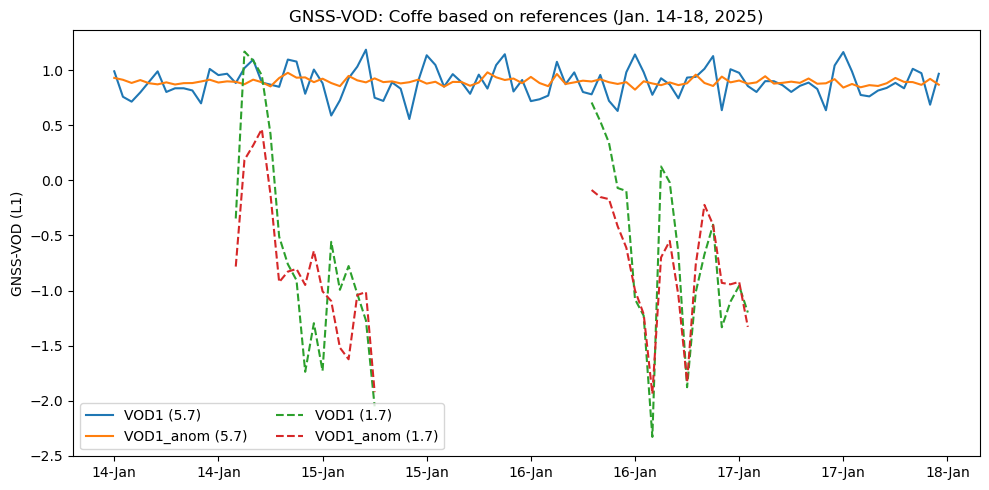

In [61]:
# --- Reset index and ensure datetime ---
vod_df = vod_ts.reset_index()
vod_df['Epoch'] = pd.to_datetime(vod_df['Epoch'])

vod_df17 = vod_ts17.reset_index()
vod_df17['Epoch'] = pd.to_datetime(vod_df17['Epoch'])

# --- Filter date range: Feb 1–6, 2025 ---
start = pd.Timestamp('2025-01-14')
end = pd.Timestamp('2025-01-17 23:59:59')

vod_filtered = vod_df[(vod_df['Epoch'] >= start) & (vod_df['Epoch'] <= end)]
vod_filtered17 = vod_df17[(vod_df17['Epoch'] >= start) & (vod_df17['Epoch'] <= end)]

# --- Plot ---
fig, ax = plt.subplots(figsize=(10, 5))

# Plot all VOD series in vod_ts (MAC 5.7)
for iname in vod_names:
    if iname in vod_filtered.columns:
        ax.plot(vod_filtered['Epoch'], vod_filtered[iname], label=f'{iname} (5.7)', linestyle='-')

# Plot all VOD series in vod_ts17 (MAC 1.7)
for iname in vod_names:
    if iname in vod_filtered17.columns:
        ax.plot(vod_filtered17['Epoch'], vod_filtered17[iname], label=f'{iname} (1.7)', linestyle='--')

# --- Formatting ---
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b'))
ax.set_ylabel('GNSS-VOD (L1)')
ax.set_title('GNSS-VOD: Coffe based on references (Jan. 14-18, 2025)')
ax.legend(ncol=2)
plt.tight_layout()
plt.show()


In [62]:
#loading VOD data
precipitation_data = pd.read_excel('/Volumes/coraldelmar/weather.station_alonso/2025/precip.xlsx')
precipitation_data['Timestamp'] = pd.to_datetime(
    precipitation_data['Timestamp'], 
    format='%d/%m/%Y %H:%M',  
    dayfirst=True            
)
precipitation_data.set_index('Timestamp', inplace=True)

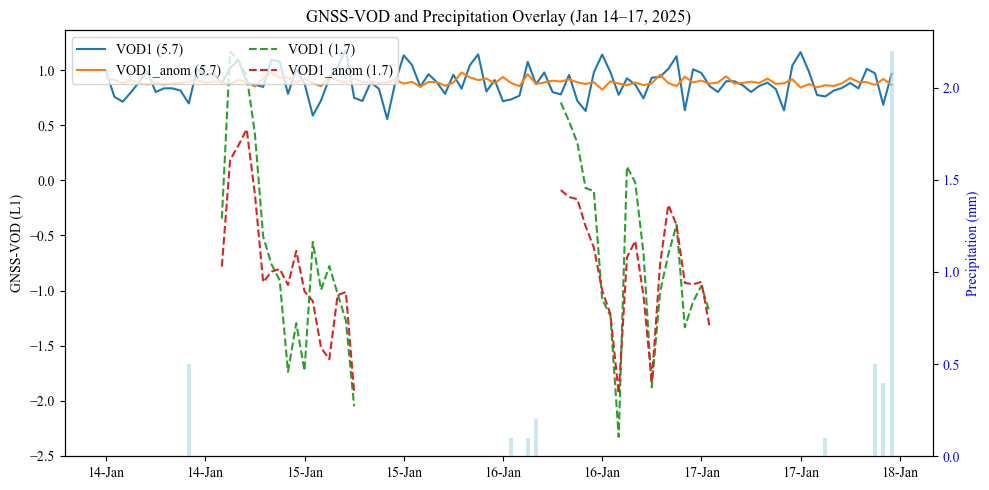

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# --- Reset index and ensure datetime ---
vod_df = vod_ts.reset_index()
vod_df['Epoch'] = pd.to_datetime(vod_df['Epoch'])

vod_df17 = vod_ts17.reset_index()
vod_df17['Epoch'] = pd.to_datetime(vod_df17['Epoch'])

# --- Load and process precipitation data ---
precipitation_data = pd.read_excel('/Volumes/coraldelmar/weather.station_alonso/2025/precip.xlsx')
precipitation_data['Timestamp'] = pd.to_datetime(precipitation_data['Timestamp'], format='%d/%m/%Y %H:%M', dayfirst=True)
precipitation_data.set_index('Timestamp', inplace=True)

# --- Filter date range: Jan 14–17, 2025 ---
start = pd.Timestamp('2025-01-14')
end = pd.Timestamp('2025-01-17 23:59:59')

vod_filtered = vod_df[(vod_df['Epoch'] >= start) & (vod_df['Epoch'] <= end)]
vod_filtered17 = vod_df17[(vod_df17['Epoch'] >= start) & (vod_df17['Epoch'] <= end)]
precip_filtered = precipitation_data[(precipitation_data.index >= start) & (precipitation_data.index <= end)]

# --- Plot ---
plt.rcParams["font.family"] = "Times New Roman"
fig, ax1 = plt.subplots(figsize=(10, 5))

# Plot GNSS-VOD (5.7)
for iname in vod_names:
    if iname in vod_filtered.columns:
        ax1.plot(vod_filtered['Epoch'], vod_filtered[iname], label=f'{iname} (5.7)', linestyle='-')

# Plot GNSS-VOD (1.7)
for iname in vod_names:
    if iname in vod_filtered17.columns:
        ax1.plot(vod_filtered17['Epoch'], vod_filtered17[iname], label=f'{iname} (1.7)', linestyle='--')

# Format primary y-axis
ax1.set_ylabel('GNSS-VOD (L1)')
ax1.set_title('GNSS-VOD and Precipitation Overlay (Jan 14–17, 2025)')
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b'))
ax1.legend(loc='upper left', ncol=2)

# --- Secondary axis for precipitation ---
ax2 = ax1.twinx()
ax2.bar(precip_filtered.index, precip_filtered['Rain_mm_Tot'], width=0.02, color='lightblue', label='Precipitation', alpha=0.6)
ax2.set_ylabel('Precipitation (mm)', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

# Final formatting
plt.tight_layout()
plt.show()


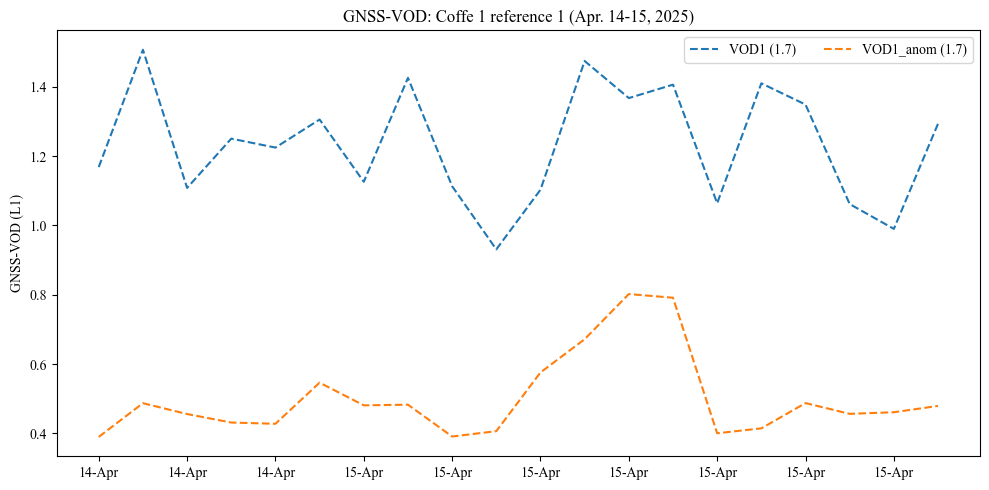

In [66]:
# --- Reset index and ensure datetime ---
vod_df = vod_ts.reset_index()
vod_df['Epoch'] = pd.to_datetime(vod_df['Epoch'])

vod_df17 = vod_ts17.reset_index()
vod_df17['Epoch'] = pd.to_datetime(vod_df17['Epoch'])

# --- Filter date range: Feb 1–6, 2025 ---
start = pd.Timestamp('2025-04-01')
end = pd.Timestamp('2025-04-16 23:59:59')

vod_filtered = vod_df[(vod_df['Epoch'] >= start) & (vod_df['Epoch'] <= end)]
vod_filtered17 = vod_df17[(vod_df17['Epoch'] >= start) & (vod_df17['Epoch'] <= end)]

# --- Plot ---
plt.rcParams["font.family"] = "Times New Roman"
fig, ax = plt.subplots(figsize=(10, 5))

# Plot all VOD series in vod_ts (MAC 5.7)
#for iname in vod_names:
   # if iname in vod_filtered.columns:
     #   ax.plot(vod_filtered['Epoch'], vod_filtered[iname], label=f'{iname} (5.7)', linestyle='-')

# Plot all VOD series in vod_ts17 (MAC 1.7)
for iname in vod_names:
    if iname in vod_filtered17.columns:
        ax.plot(vod_filtered17['Epoch'], vod_filtered17[iname], label=f'{iname} (1.7)', linestyle='--')

# --- Formatting ---
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b'))
ax.set_ylabel('GNSS-VOD (L1)')
ax.set_title('GNSS-VOD: Coffe 1 reference 1 (Apr. 14-15, 2025)')
ax.legend(ncol=2)
plt.tight_layout()
plt.show()


In [ ]:
# --- Reset index and ensure datetime ---
vod_df = vod_ts.reset_index()
vod_df['Epoch'] = pd.to_datetime(vod_df['Epoch'])

vod_df17 = vod_ts17.reset_index()
vod_df17['Epoch'] = pd.to_datetime(vod_df17['Epoch'])

# --- Filter date range: Feb 1–6, 2025 ---
start = pd.Timestamp('2025-03-01')
end = pd.Timestamp('2025-03-06 23:59:59')

vod_filtered = vod_df[(vod_df['Epoch'] >= start) & (vod_df['Epoch'] <= end)]
vod_filtered17 = vod_df17[(vod_df17['Epoch'] >= start) & (vod_df17['Epoch'] <= end)]

# --- Plot ---
fig, ax = plt.subplots(figsize=(10, 5))

# Plot all VOD series in vod_ts (MAC 5.7)
for iname in vod_names:
    if iname in vod_filtered.columns:
        ax.plot(vod_filtered['Epoch'], vod_filtered[iname], label=f'{iname} (5.7)', linestyle='-')

# Plot all VOD series in vod_ts17 (MAC 1.7)
for iname in vod_names:
    if iname in vod_filtered17.columns:
        ax.plot(vod_filtered17['Epoch'], vod_filtered17[iname], label=f'{iname} (1.7)', linestyle='--')

# --- Formatting ---
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b'))
ax.set_ylabel('GNSS-VOD (L1)')
ax.set_title('GNSS-VOD: MAC5.7 vs MAC1.7 (Feb 1–6, 2025)')
ax.legend(ncol=2)
plt.tight_layout()
plt.show()


In [ ]:
fig, ax = plt.subplots(figsize=(12, 5))

# Get stations from both filtered datasets and exclude MACROCOSM-7
stations = filtered_window_df.index.get_level_values('Station').unique().union(
    filtered_window_df17.index.get_level_values('Station').unique()
)
stations = [s for s in stations if s != 'MACROCOSM-7']  # 👈 filter out

# Plot each station's S1C
for station in stations:
    try:
        sub_df = filtered_window_df.xs((station, sv_to_plot), level=('Station', 'SV'))
        ax.plot(sub_df.index.get_level_values('Epoch'), sub_df['S1C'],
                label=f'{station} (df)', linestyle='-')
    except KeyError:
        pass

    try:
        sub_df17 = filtered_window_df17.xs((station, sv_to_plot), level=('Station', 'SV'))
        ax.plot(sub_df17.index.get_level_values('Epoch'), sub_df17['S1C'],
                label=f'{station} (df17)', linestyle='--')
    except KeyError:
        pass

# Format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d\n%H:%M'))
ax.set_title(f'S1C for SV {sv_to_plot} — Jan 14–16, 2025 (excluding MACROCOSM-7)')
ax.set_ylabel('SNR (S1C)')
ax.set_xlabel('Epoch')
ax.legend(fontsize='small', ncol=2)
plt.tight_layout()
plt.show()
